<a href="https://colab.research.google.com/github/PAGIDIPALARAGHU/Data-science/blob/main/7150_prject_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Required Libraries

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
np.random.seed(42)
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')


In [ ]:
!pip install opendatasets
import opendatasets as od
od.download('https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/download?datasetVersionNumber=1')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pagidipalaraghu
Your Kaggle Key: ··········


100%|██████████| 612M/612M [00:03<00:00, 177MB/s]


In [ ]:
main_dir = '/content/gtsrb-german-traffic-sign'
path_train = '/content/gtsrb-german-traffic-sign/Train'
classes=pd.read_csv('Classes.csv')
class_dic= classes['class'].to_dict()
class_dic
no_class=len(classes['class'])
print("No of traffic sign categories:",no_class)
data_train=pd.read_csv('/content/gtsrb-german-traffic-sign/Train.csv')
data_train

No of traffic sign categories: 43


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png
...,...,...,...,...,...,...,...,...
39204,52,56,5,6,47,51,42,Train/42/00042_00007_00025.png
39205,56,58,5,5,51,53,42,Train/42/00042_00007_00026.png
39206,58,62,5,6,53,57,42,Train/42/00042_00007_00027.png
39207,63,69,5,7,58,63,42,Train/42/00042_00007_00028.png


In [ ]:
data_train['ClassId'].nunique()

43

In [ ]:
for i in range(43):
   data_train.loc[data_train['ClassId']==i, 'ClassId'] = class_dic[i]
data_train

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,Dangerous curve right,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,Dangerous curve right,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,Dangerous curve right,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,Dangerous curve right,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,Dangerous curve right,Train/20/00020_00000_00004.png
...,...,...,...,...,...,...,...,...
39204,52,56,5,6,47,51,End no passing veh > 3.5 tons,Train/42/00042_00007_00025.png
39205,56,58,5,5,51,53,End no passing veh > 3.5 tons,Train/42/00042_00007_00026.png
39206,58,62,5,6,53,57,End no passing veh > 3.5 tons,Train/42/00042_00007_00027.png
39207,63,69,5,7,58,63,End no passing veh > 3.5 tons,Train/42/00042_00007_00028.png


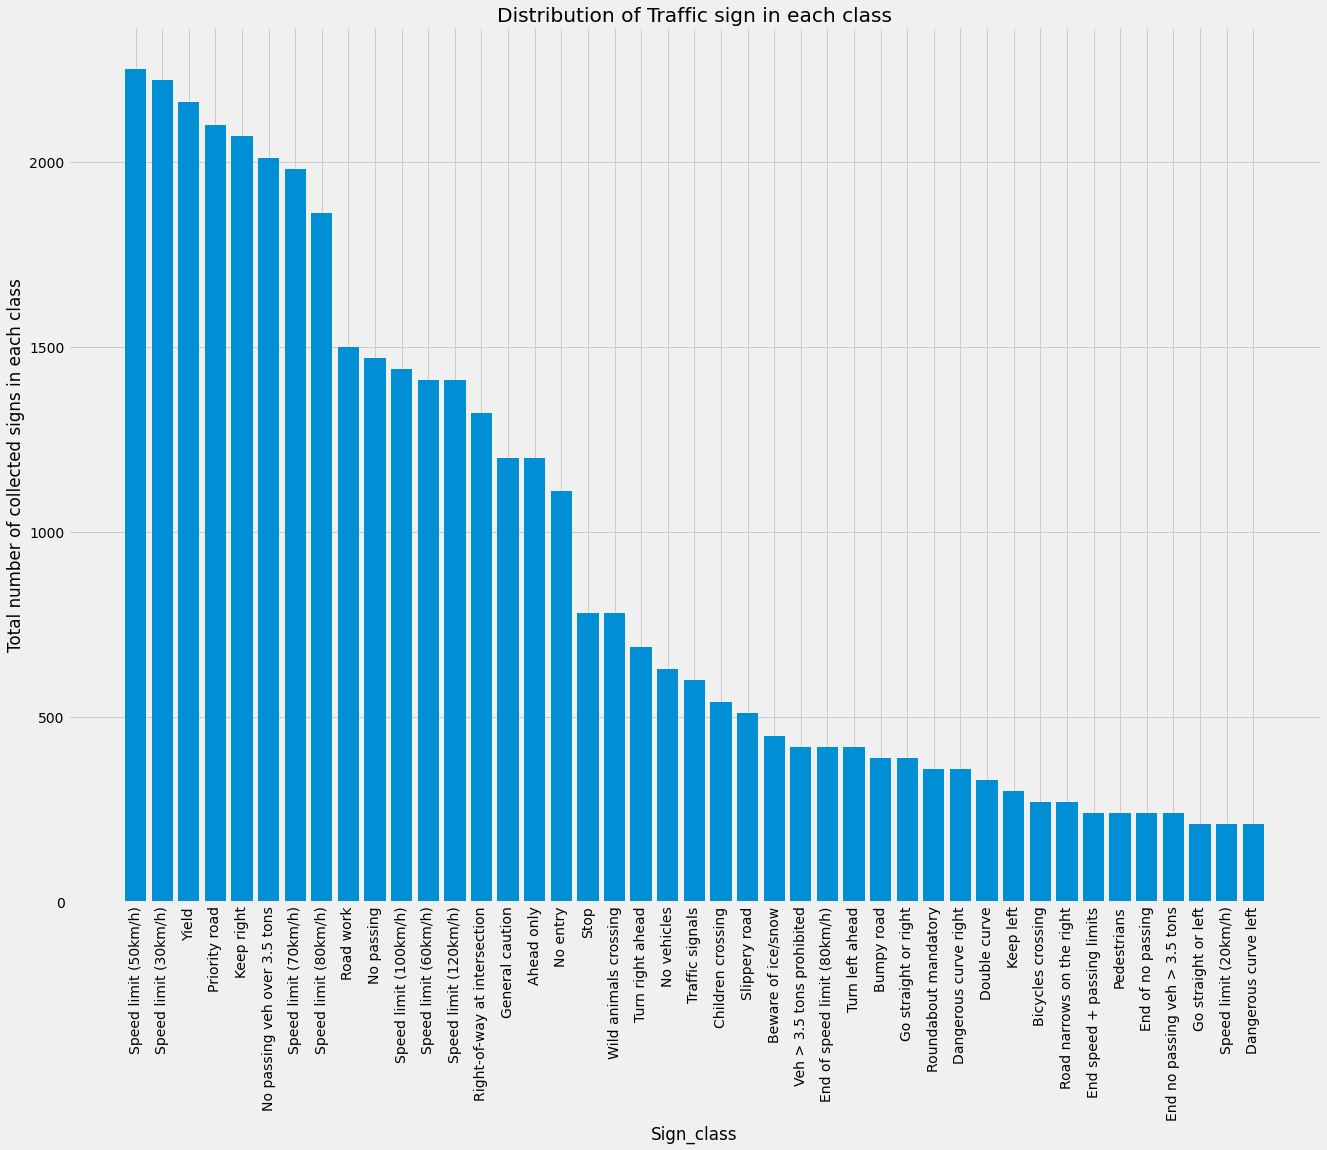

In [ ]:
data_dic=dict(data_train['ClassId'].value_counts())
sign_name=list(data_dic.keys())
total_signs=list(data_dic.values())

plt.figure(figsize=(20,15))
plt.bar(sign_name,total_signs)
plt.xlabel("Sign_class")
plt.ylabel("Total number of collected signs in each class")
plt.title("Distribution of Traffic sign in each class")
plt.xticks(sign_name,rotation='vertical')
plt.tick_params(colors='black')

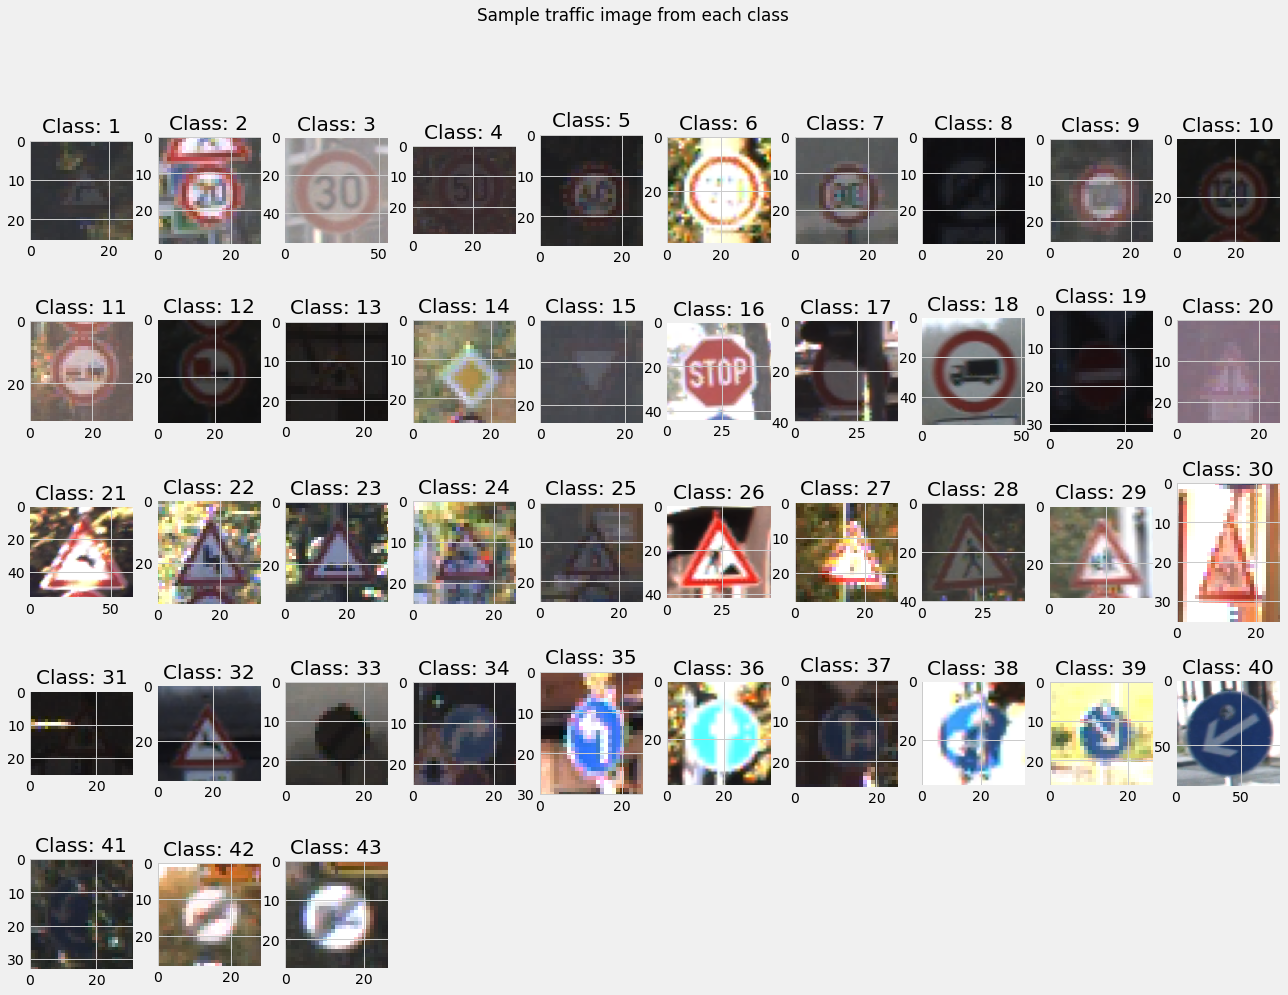

In [ ]:
from matplotlib.image import imread
import matplotlib.image as mpimg
class_cat = []
sign_images= []
for index, sign_data in data_train.iterrows():
    file_name = sign_data['Path']
    class_id = sign_data['ClassId']
    if class_id not in class_cat:
        class_cat.append(class_id)
        sign_images.append(mpimg.imread(os.path.join(main_dir,file_name)))

plt.figure(figsize=(20,15))
plt.suptitle('Sample traffic image from each class')
columns = 10
for i, sign in enumerate(sign_images):
    plt.subplot(len(sign_images) / columns + 1, columns, i + 1)
    plt.title(f'Class: {i+1}', color='black')
    plt.imshow(sign)

In [ ]:
sign_image_data = []
sign_image_labels = []
for i in range(no_class):
    path = path_train + '/'+ str(i)
    images = os.listdir(path)
    for sign in images:
        try:
            image_sign = cv2.imread(path + '/' + sign)
            sign_fromarray = Image.fromarray(image_sign, 'RGB')
            image_resize = sign_fromarray.resize((30,30))
            sign_image_data.append(np.array(image_resize))
            sign_image_labels.append(i)
        except:
            print("Error in " + sign)
# Changing the list to numpy array
sign_image_data = np.array(sign_image_data)
sign_image_labels = np.array(sign_image_labels)
print(sign_image_data.shape, sign_image_labels.shape)

(39209, 30, 30, 3) (39209,)


In [ ]:
ind_shufle = np.arange(sign_image_data.shape[0])
np.random.shuffle(ind_shufle)
sign_image_data = sign_image_data[ind_shufle]
sign_image_labels = sign_image_labels[ind_shufle]

X_train, X_val, y_train, y_val = train_test_split(sign_image_data, sign_image_labels, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27446, 30, 30, 3)
X_valid.shape (11763, 30, 30, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


In [ ]:
y_train = keras.utils.to_categorical(y_train, no_class)
y_val = keras.utils.to_categorical(y_val, no_class)

print(y_train.shape)
print(y_val.shape)

(27446, 43)
(11763, 43)


In [ ]:
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(30,30,3)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(43, activation='softmax')
])
lr = 0.001
epochs = 15

optr = Adam(lr=lr, decay=lr / (epochs * 0.5))
model.compile(loss='categorical_crossentropy', optimizer=optr, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/15
858/858 [==============================] - 26s 21ms/step - loss: 1.0111 - accuracy: 0.7250 - val_loss: 0.0706 - val_accuracy: 0.9797
Epoch 2/15
858/858 [==============================] - 18s 21ms/step - loss: 0.1802 - accuracy: 0.9448 - val_loss: 0.0527 - val_accuracy: 0.9840
Epoch 3/15
858/858 [==============================] - 17s 20ms/step - loss: 0.1048 - accuracy: 0.9684 - val_loss: 0.0360 - val_accuracy: 0.9895
Epoch 4/15
858/858 [==============================] - 17s 20ms/step - loss: 0.0749 - accuracy: 0.9774 - val_loss: 0.0138 - val_accuracy: 0.9960
Epoch 5/15
858/858 [==============================] - 17s 20ms/step - loss: 0.0595 - accuracy: 0.9821 - val_loss: 0.0252 - val_accuracy: 0.9926
Epoch 6/15
858/858 [==============================] - 17s 20ms/step - loss: 0.0450 - accuracy: 0.9851 - val_loss: 0.0826 - val_accuracy: 0.9742
Epoch 7/15
858/858 [==============================] - 17s 20ms/step - loss: 0.0386 - accuracy: 0.9881 - val_loss: 0.0125 - val_accuracy:

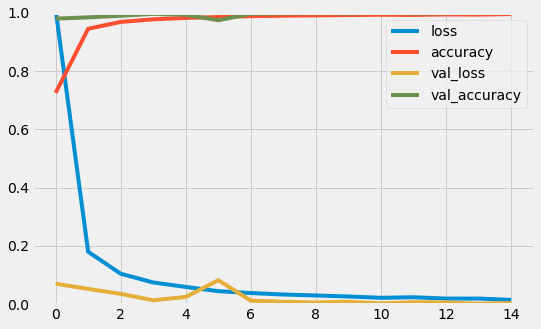

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
test_data = pd.read_csv("/content/gtsrb-german-traffic-sign/Test.csv")

test_labels = test_data["ClassId"].values
test_sign = test_data["Path"].values
test_sign_data =[]
for sign in test_sign:
    try:
        sign_image = cv2.imread(main_dir + '/' +sign)
        sign_image_fromarray = Image.fromarray(sign_image, 'RGB')
        resize_image = sign_image_fromarray.resize((30, 30))
        test_sign_data.append(np.array(resize_image))
    except:
        print("Error in " + sign)
X_test = np.array(test_sign_data)
X_test = X_test/255

# pred = model.predict_classes(X_test)
predict = np.argmax(model.predict(X_test), axis=-1)
#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(test_labels, predict)*100)

395/395 [==============================] - 1s 2ms/step
Test Data accuracy:  98.48772763262075


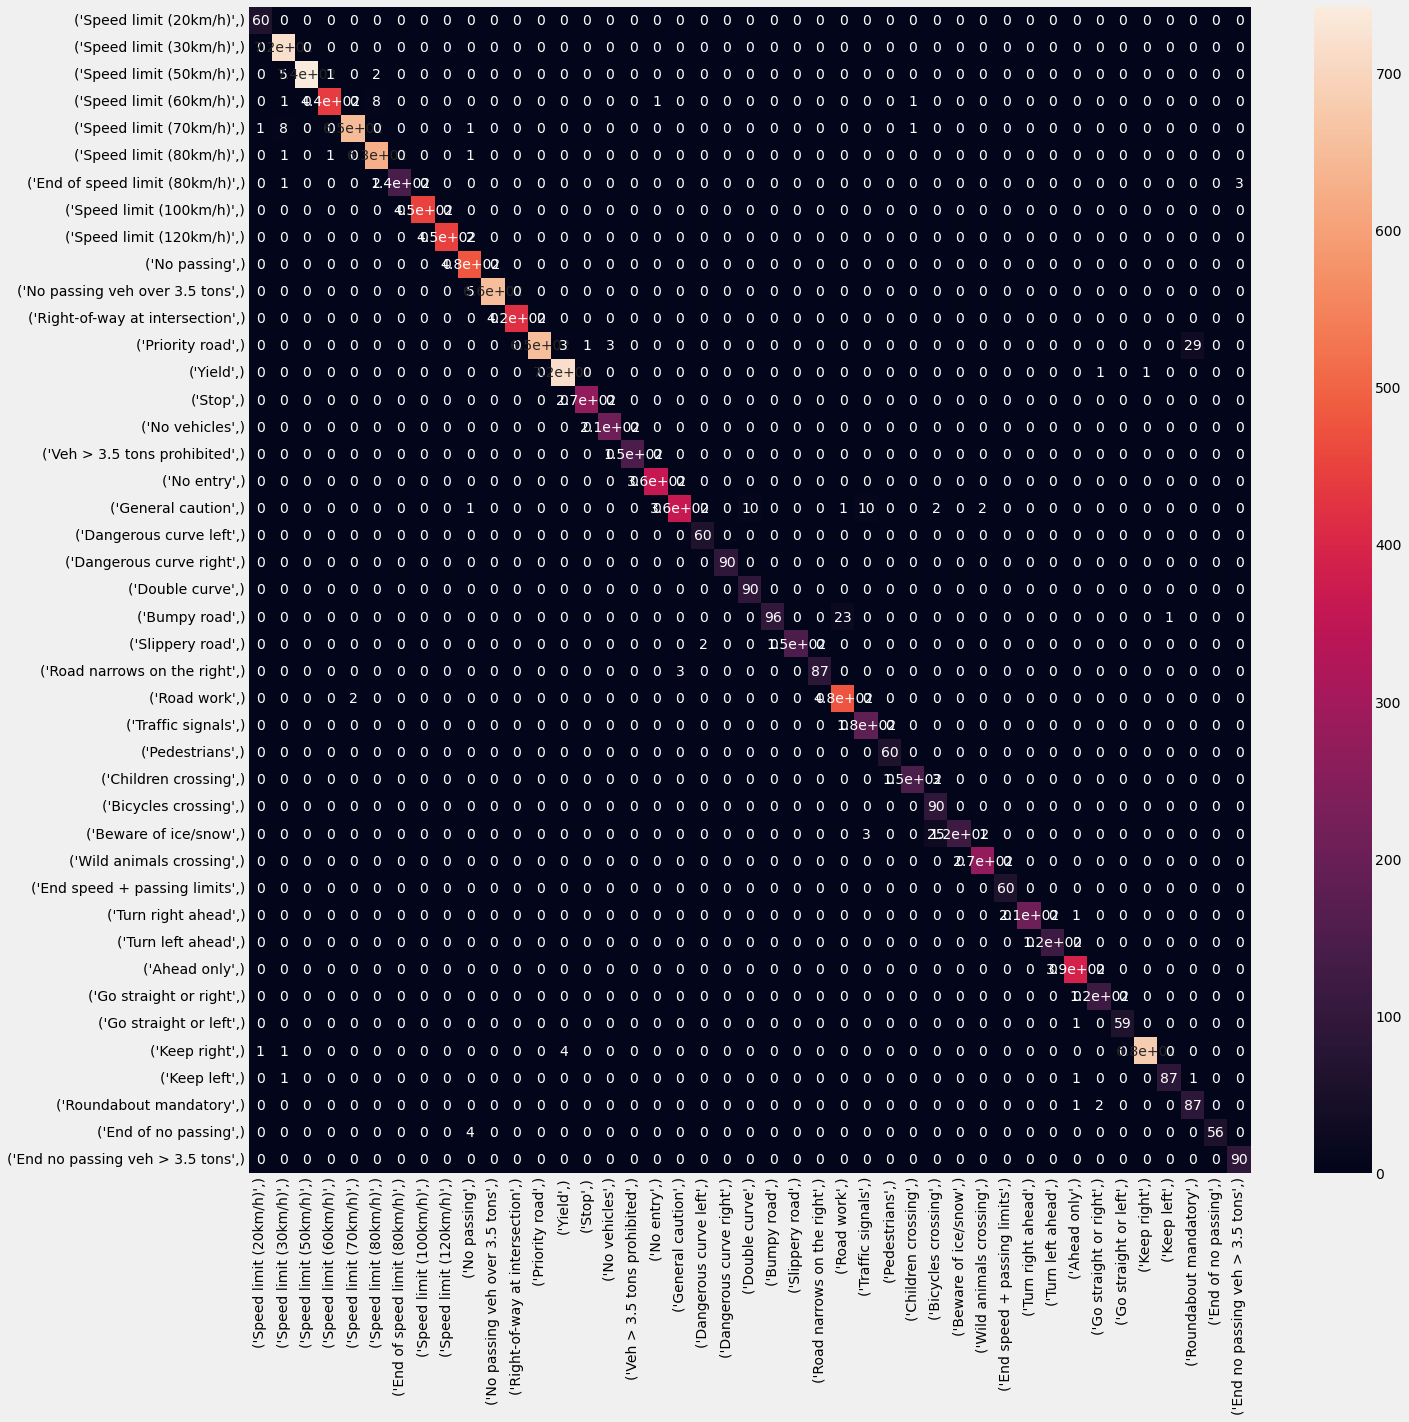

In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(test_labels, predict)
import seaborn as sns
data_cnf_matrix = pd.DataFrame(cnf_matrix, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
sns.heatmap(data_cnf_matrix, annot=True)

In [ ]:
from sklearn.metrics import classification_report
classification_report=classification_report(test_labels, predict)
print(classification_report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        60
           1       0.98      1.00      0.99       720
           2       1.00      0.99      0.99       750
           3       1.00      0.98      0.99       450
           4       1.00      0.98      0.99       660
           5       0.98      1.00      0.99       630
           6       1.00      0.96      0.98       150
           7       1.00      1.00      1.00       450
           8       1.00      1.00      1.00       450
           9       0.97      1.00      0.99       480
          10       1.00      0.99      1.00       660
          11       1.00      1.00      1.00       420
          12       1.00      0.95      0.97       690
          13       0.99      1.00      0.99       720
          14       1.00      1.00      1.00       270
          15       0.99      1.00      0.99       210
          16       1.00      1.00      1.00       150
          17       1.00    

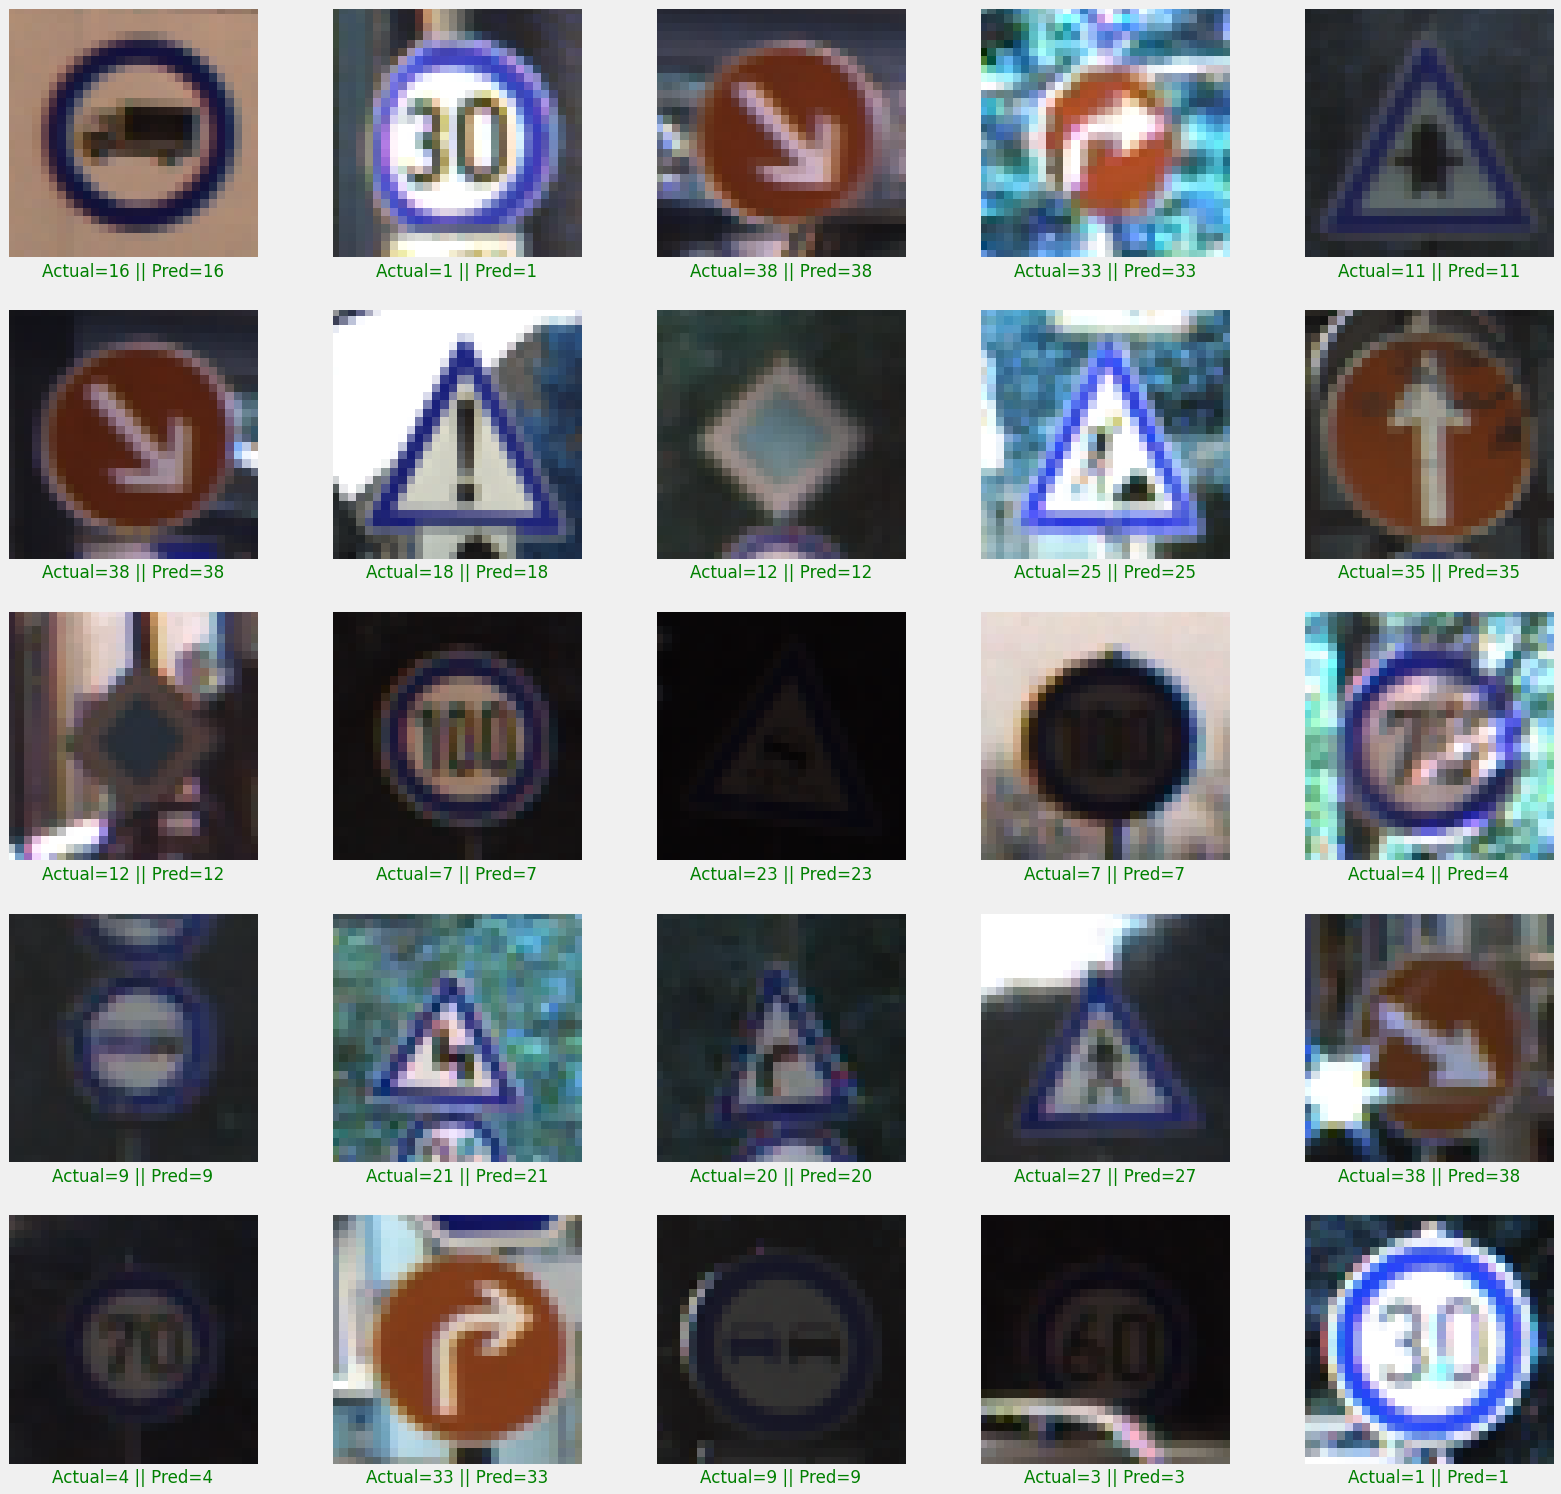

In [ ]:
plt.figure(figsize = (25, 25))
index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    prediction = predict[index + i]
    actual = test_labels[index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color=col)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[index + i])
plt.show()